In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib.patches import Rectangle

%matplotlib inline

In [2]:
from matplotlib import rc
font = {'size'   : 18}
rc('font', **font)

In [3]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')
data

,Gross pay,Phi-h,Position,Pressure,Random 1,Random 2,Gross pay transform,Production
0,0.1,0.5,2.1,19,5,379,3.54,15.10
1,1.0,4.0,1.1,16,13,269,5.79,21.30
2,1.9,19.0,1.0,14,12,245,8.51,22.75
3,3.1,21.7,2.1,17,6,273,11.52,15.72
4,4.1,24.6,2.9,11,10,237,10.16,7.71
5,4.9,39.2,1.1,12,7,278,11.14,22.67
6,5.9,23.6,2.1,13,13,241,15.04,18.11
7,7.0,63.0,2.0,13,20,269,15.10,24.30
8,8.1,72.9,2.9,14,1,248,14.49,24.04
9,8.9,35.6,2.8,16,1,210,16.90,25.11


#### Kalkomey's probability of spuriousness

In the context of a single (seismic) attribute as a possible predictor of a reservoir porperty, **Kalkomey (1997, Reference 3)** defined spuriousness as the probability of observing the absolute value of the sample correlation, r, being greater than some constant, R, given the true (population) correlation ρ is zero is given by:

\begin{equation*}
p_{sc} = Pr (|r|>= R)= Pr \Bigl( |t| >= \frac{R \sqrt{n-2}}{\sqrt{1-R^2}} \Bigr)
\end{equation*}


where n is the sample size or number of locations (the wells) with measurements of both the reservoir property and the seismic attribute, and t is the Student’s t distribution with n-2 degrees of freedom.

This probability of spuriousness psc is the same as the well-known p-value, and we can rephrase the above as per my definition of p-value: p it is the probability of getting a sample with at least the correlation coefficient we just got or even higher, purely by chance.

With multiple attributes ..... bla bla .....

\begin{equation*}
1-(1-p_{sc})^{k} =  \sum_{i=1}^k  p_{sc}(1-p_{sc})^{(i-1)}
\end{equation*}


The function below calculates psc:

In [4]:
def P_spurious (r, nwells, nattributes):
    t_of_r = r * np.sqrt((nwells-2)/(1-np.power(r,2)))  
    p = sp.stats.t.sf(np.abs(t_of_r), nwells-2)*2 
    ks = np.arange(1, nattributes+1, 1)
    return np.sum(p * np.power(1-p, ks-1))

Notice that the probability of spuriousness depends solely on the number of attributes, the number of wells n and the magnitude R of the spurious sample correlation.

We want to use the function to replicat Tables 2-5 in the paper.

In [5]:
nrs = np.arange(0.1, 1, 0.1).round(decimals=2) # to avoid odd tick label problem
wells= np.asarray([5, 10, 15, 20, 25, 35, 50, 75, 100])

##### 10 attributes - replicating Table 3

In [6]:
ps = np.asarray([P_spurious(R, nw, 10)  for R in nrs for nw in wells]).reshape(9,9)

In [7]:
psdf = pd.DataFrame(ps, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

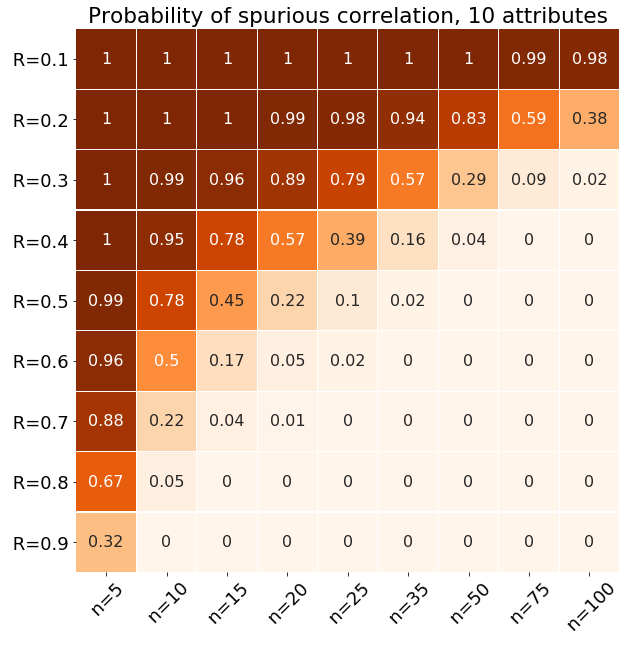

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(psdf, annot=True, annot_kws={"size": 16}, cmap='Oranges', square=True, linewidths=0.01, cbar=False)
plt.yticks(rotation=0) 
plt.xticks(rotation=45)
plt.title('Probability of spurious correlation, 10 attributes')
plt.show()
plt.savefig('Kalcomey_T3.png', dpi=400, bbox_inches='tight', pad_inches=0.1)

##### 1 attribute - replicating Table 1

When there is only one attribute the probability of spuriousness depends only on the number of wells n and the magnitude R of the spurious sample correlation.

In [9]:
ps = np.asarray([P_spurious(R, nw, 1)  for R in nrs for nw in wells]).reshape(9,9)

In [10]:
psdf = pd.DataFrame(ps, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

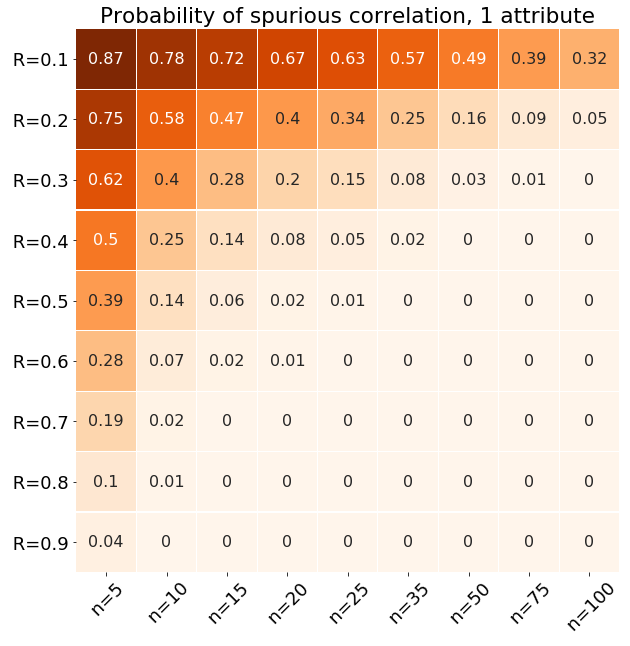

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(psdf, annot=True,annot_kws={"size": 16}, cmap='Oranges', square=True, linewidths=0.01, cbar=False)
plt.yticks(rotation=0) 
plt.xticks(rotation=45)
plt.title('Probability of spurious correlation, 1 attribute')
plt.show()
plt.savefig('Kalcomey_T1.png', dpi=400, bbox_inches='tight', pad_inches=0.1)

In [12]:
nrs = np.arange(0, 1, 0.05).round(decimals=2)
wells= np.arange(5, 23, 1)
print ( np.shape (nrs), np.shape (wells))

(20,) (18,)


In [13]:
ps = np.asarray([P_spurious(R, nw, 1)  for R in nrs for nw in wells]).reshape(20,18)
psdf = pd.DataFrame(ps, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

In [14]:
psdf

,n=5,n=6,n=7,n=8,n=9,n=10,n=11,n=12,n=13,n=14,n=15,n=16,n=17,n=18,n=19,n=20,n=21,n=22
R=0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
R=0.05,0.94,0.93,0.92,0.91,0.90,0.89,0.88,0.88,0.87,0.87,0.86,0.85,0.85,0.84,0.84,0.83,0.83,0.83
R=0.1,0.87,0.85,0.83,0.81,0.80,0.78,0.77,0.76,0.75,0.73,0.72,0.71,0.70,0.69,0.68,0.67,0.67,0.66
R=0.15,0.81,0.78,0.75,0.72,0.70,0.68,0.66,0.64,0.62,0.61,0.59,0.58,0.57,0.55,0.54,0.53,0.52,0.51
R=0.2,0.75,0.70,0.67,0.63,0.61,0.58,0.56,0.53,0.51,0.49,0.47,0.46,0.44,0.43,0.41,0.40,0.38,0.37
R=0.25,0.69,0.63,0.59,0.55,0.52,0.49,0.46,0.43,0.41,0.39,0.37,0.35,0.33,0.32,0.30,0.29,0.27,0.26
R=0.3,0.62,0.56,0.51,0.47,0.43,0.40,0.37,0.34,0.32,0.30,0.28,0.26,0.24,0.23,0.21,0.20,0.19,0.17
R=0.35,0.56,0.50,0.44,0.40,0.36,0.32,0.29,0.26,0.24,0.22,0.20,0.18,0.17,0.15,0.14,0.13,0.12,0.11
R=0.4,0.50,0.43,0.37,0.33,0.29,0.25,0.22,0.20,0.18,0.16,0.14,0.12,0.11,0.10,0.09,0.08,0.07,0.07
R=0.45,0.45,0.37,0.31,0.26,0.22,0.19,0.16,0.14,0.12,0.11,0.09,0.08,0.07,0.06,0.05,0.05,0.04,0.04


#### Plot multiple columns of graph versus CC vs n wells

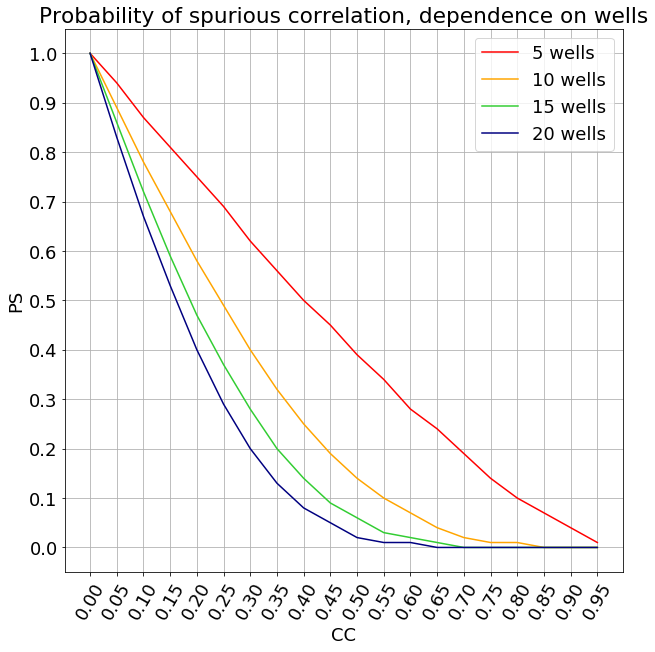

In [15]:
fig = plt.subplots(figsize=(10, 10))
plt.plot(nrs, psdf[' n=5'], 'r', label = '5 wells')
plt.plot(nrs, psdf[' n=10'], 'Orange', label = '10 wells')
plt.plot(nrs, psdf[' n=15'], 'limegreen', label = '15 wells')
plt.plot(nrs, psdf[' n=20'], 'navy', label = '20 wells')
plt.xticks(np.arange(0, 1, 0.05).round(decimals=2), rotation = 60)
plt.yticks(np.arange(0, 1.05, 0.1))
plt.ylabel('PS')
plt.xlabel('CC')
plt.title('Probability of spurious correlation, dependence on wells')
plt.grid()
plt.legend();
plt.savefig('Kalcomey_PS_wells.png', dpi=400, bbox_inches='tight', pad_inches=0.1)

In [16]:
ps1 = np.asarray([P_spurious(R, nw, 1)  for R in nrs for nw in wells]).reshape(20,18)
psdf1 = pd.DataFrame(ps1, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

ps2 = np.asarray([P_spurious(R, nw, 2)  for R in nrs for nw in wells]).reshape(20,18)
psdf2 = pd.DataFrame(ps2, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

ps4 = np.asarray([P_spurious(R, nw, 4)  for R in nrs for nw in wells]).reshape(20,18)
psdf4 = pd.DataFrame(ps4, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

ps8 = np.asarray([P_spurious(R, nw, 8)  for R in nrs for nw in wells]).reshape(20,18)
psdf8 = pd.DataFrame(ps8, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

ps16 = np.asarray([P_spurious(R, nw, 16)  for R in nrs for nw in wells]).reshape(20,18)
psdf16 = pd.DataFrame(ps16, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

ps32 = np.asarray([P_spurious(R, nw, 32)  for R in nrs for nw in wells]).reshape(20,18)
psdf32 = pd.DataFrame(ps32, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

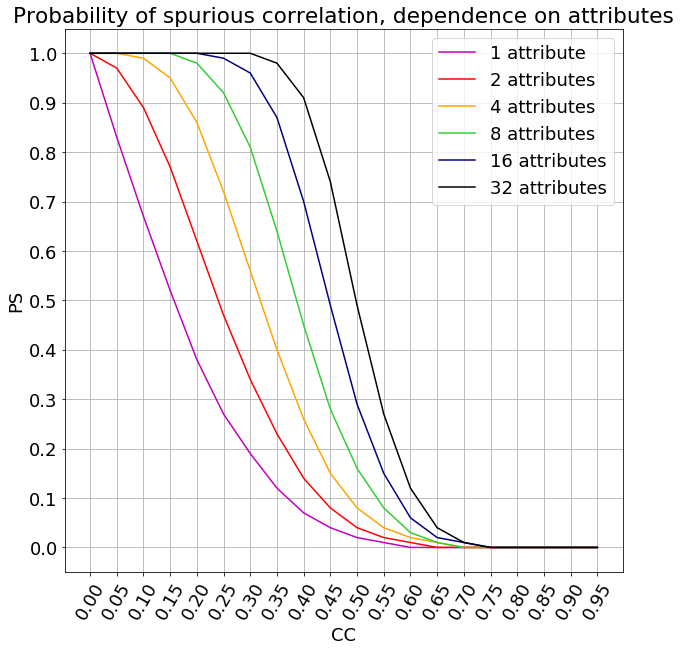

In [17]:
fig = plt.subplots(figsize=(10, 10))
plt.plot(nrs, psdf1[' n=21'], 'm', label = '1 attribute')
plt.plot(nrs, psdf2[' n=21'], 'r', label = '2 attributes')
plt.plot(nrs, psdf4[' n=21'], 'Orange', label = '4 attributes')
plt.plot(nrs, psdf8[' n=21'], 'limegreen', label = '8 attributes')
plt.plot(nrs, psdf16[' n=21'], 'navy', label = '16 attributes')
plt.plot(nrs, psdf32[' n=21'], 'k', label = '32 attributes')
plt.xticks(np.arange(0, 1, 0.05).round(decimals=2), rotation = 60)
plt.yticks(np.arange(0, 1.05, 0.1))
plt.ylabel('PS')
plt.xlabel('CC')
plt.title('Probability of spurious correlation, dependence on attributes')
plt.grid()
plt.legend();
plt.savefig('Kalcomey_PS_attributes.png', dpi=400, bbox_inches='tight', pad_inches=0.1)